In [1]:
#%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Input, LeakyReLU, BatchNormalization, UpSampling2D, MaxPooling2D
from tensorflow.keras.layers import concatenate
from keras.optimizers import Adam
import tensorflow as tf

In [4]:
import os
print(os.listdir("C:\\Users\\admin\\Desktop\\Deep learning\\newdataset"))


['ab', 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5', 'l']


In [5]:

gray_images=np.load('C:\\Users\\admin\\Desktop\\Deep learning\\newdataset\\l\\gray_scale.npy')



In [6]:
lab_images=np.load('C:\\Users\\admin\\Desktop\\Deep learning\\newdataset\\ab\\ab\\ab1.npy')


In [7]:
print(gray_images.shape)

(25000, 224, 224)


In [8]:
print(lab_images.shape)

(10000, 224, 224, 2)


In [9]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(gray_images, batch_size = 600)

In [10]:
test_input = imgs_for_input[500:600, :, :, :]
test_input.shape

(100, 224, 224, 3)

In [11]:
imgs_for_input = imgs_for_input[0:500, :, :, :]
imgs_for_input.shape

(500, 224, 224, 3)

In [12]:
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))
    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)
   
    return imgs_
    
#preprocess the input to 
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = gray_images, ab_imgs = lab_images, n = 600))
print(imgs_for_input.shape)
imgs_for_output.shape

(500, 224, 224, 3)


(600, 224, 224, 3)

In [13]:
test_output = imgs_for_output[500:600, :, :, :]
test_output.shape

(100, 224, 224, 3)

In [14]:
imgs_for_output = imgs_for_output[0:500, :, :, :]
imgs_for_output.shape

(500, 224, 224, 3)

In [15]:
model = Sequential()
model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model.add(Conv2D(strides = 1, kernel_size = 3, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model.add(BatchNormalization())
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 48, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

In [16]:
from tensorflow.keras.losses import MeanSquaredError
model.compile(optimizer = Adam(epsilon = 1e-8), loss = MeanSquaredError(), metrics=['accuracy'])

In [17]:
history= model.fit(imgs_for_input, imgs_for_output, epochs = 20, batch_size = 16, verbose = 1, validation_split = 0.2)


Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.3665 - accuracy: 0.5301 - val_loss: 0.3849 - val_accuracy: 0.4677
Epoch 2/20
25/25 [==============================] - 45s 2s/step - loss: 0.3446 - accuracy: 0.5635 - val_loss: 0.3747 - val_accuracy: 0.4917
Epoch 3/20
25/25 [==============================] - 46s 2s/step - loss: 0.3335 - accuracy: 0.5549 - val_loss: 0.3574 - val_accuracy: 0.5166
Epoch 4/20
25/25 [==============================] - 45s 2s/step - loss: 0.3243 - accuracy: 0.5683 - val_loss: 0.3531 - val_accuracy: 0.5703
Epoch 5/20
25/25 [==============================] - 44s 2s/step - loss: 0.3257 - accuracy: 0.5642 - val_loss: 0.3459 - val_accuracy: 0.5120
Epoch 6/20
25/25 [==============================] - 44s 2s/step - loss: 0.3232 - accuracy: 0.5574 - val_loss: 0.3473 - val_accuracy: 0.5766
Epoch 7/20
25/25 [==============================] - 45s 2s/step - loss: 0.3226 - accuracy: 0.5705 - val_loss: 0.3385 - val_accuracy: 0.5403
Epoch 8/20
25/25 [==

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 12)      336       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 24)      2616      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 24)     96        
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 222, 222, 48)     10416     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 224, 224, 3)      1299      
 ranspose)                                                       
                                                        

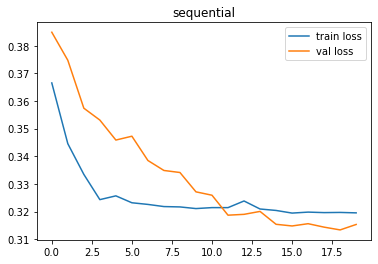

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title(model.name)
plt.legend()
plt.grid(False)
plt.show()
plt.savefig('LossVal_loss')

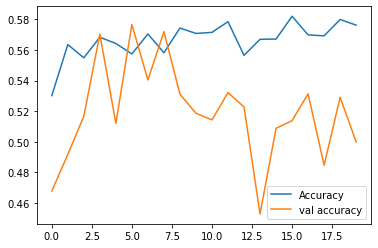

In [20]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

In [21]:
#model.compile(optimizer = Adam(epsilon = 1e-8), loss = MeanSquaredError(), metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [22]:
# history= model.fit(imgs_for_input, imgs_for_output, epochs = 10, batch_size = 16, verbose = 1, validation_split = 0.2)
# print(history)

In [23]:
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.title(model.name)
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

In [24]:
model.save('model.h5')

In [22]:
  predictions= model.predict(imgs_for_input)

16/16 [==============================] - 18s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


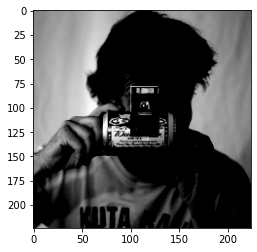

In [23]:
plt.imshow(imgs_for_input[300])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


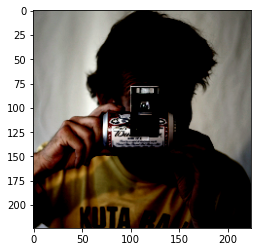

In [24]:
plt.imshow(imgs_for_output[300])

In [25]:
scor = model.evaluate(np.array(test_input),  np.array(test_output), verbose=2)
print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

4/4 - 4s - loss: 0.3242 - accuracy: 0.5984 - 4s/epoch - 937ms/step
test los 0.3242
test acc 0.5984


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


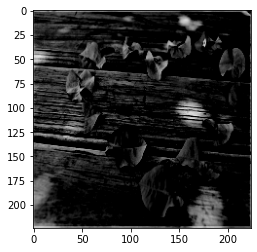

In [26]:
plt.imshow(imgs_for_input[1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


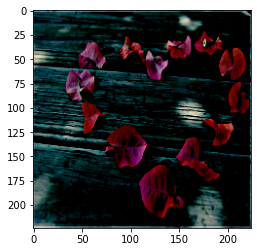

In [27]:
plt.imshow(imgs_for_output[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


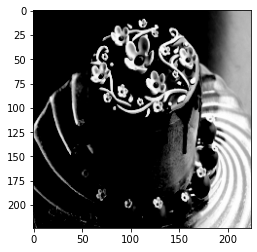

In [28]:
plt.imshow(imgs_for_input[2])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


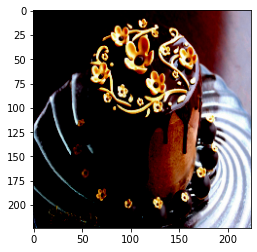

In [29]:
plt.imshow(imgs_for_output[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


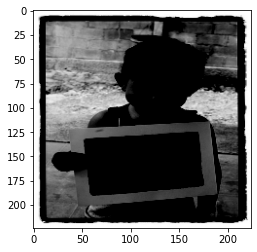

In [30]:
plt.imshow(imgs_for_input[488])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


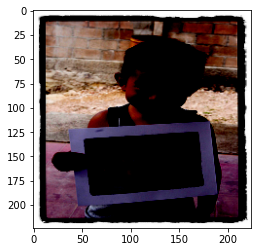

In [31]:
plt.imshow(imgs_for_output[488])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


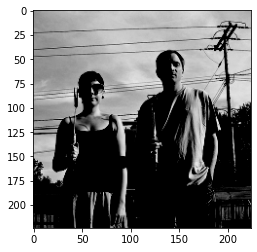

In [32]:
plt.imshow(imgs_for_input[478])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


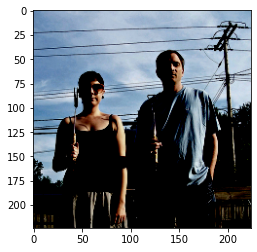

In [33]:
plt.imshow(imgs_for_output[478])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


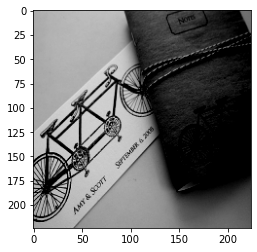

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


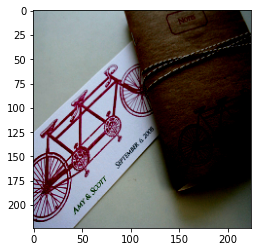

In [34]:
plt.imshow(imgs_for_input[468])
plt.show()
plt.imshow(imgs_for_output[468])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


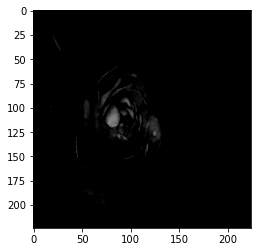

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


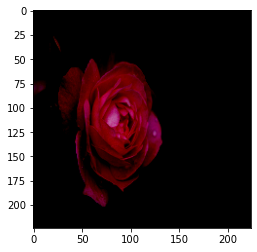

In [35]:
plt.imshow(imgs_for_input[378])
plt.show()
plt.imshow(imgs_for_output[378])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


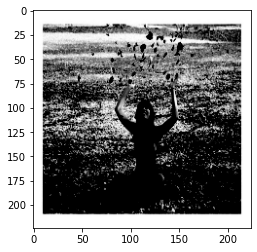

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


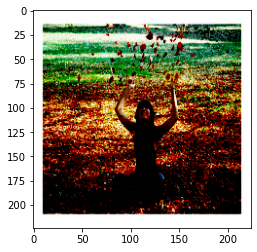

In [36]:
plt.imshow(imgs_for_input[333])
plt.show()
plt.imshow(imgs_for_output[333])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


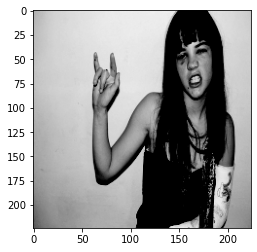

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


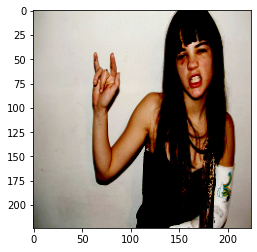

In [37]:
plt.imshow(imgs_for_input[11])
plt.show()
plt.imshow(imgs_for_output[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


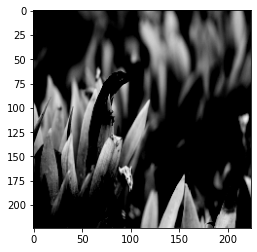

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


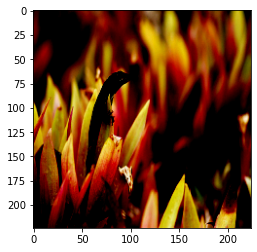

In [38]:
plt.imshow(imgs_for_input[21])
plt.show()
plt.imshow(imgs_for_output[21])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


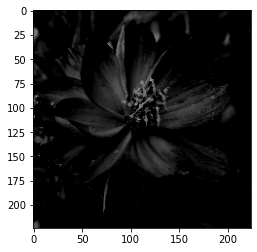

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


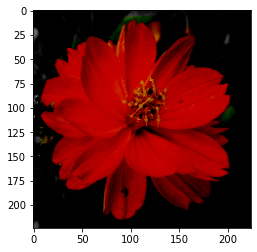

In [39]:
plt.imshow(imgs_for_input[111])
plt.show()
plt.imshow(imgs_for_output[111])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


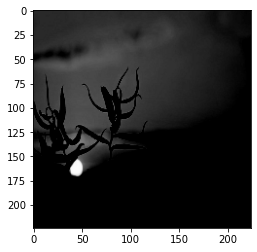

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


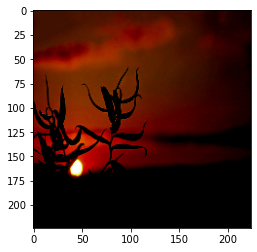

In [40]:
plt.imshow(imgs_for_input[101])
plt.show()
plt.imshow(imgs_for_output[101])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


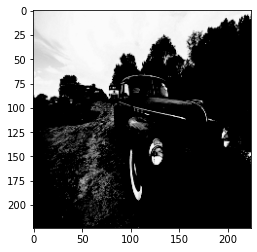

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


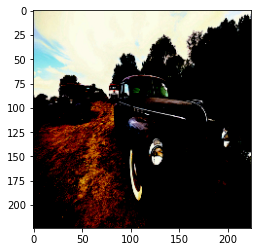

In [45]:
plt.imshow(imgs_for_input[55])
plt.show()
plt.imshow(imgs_for_output[55])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


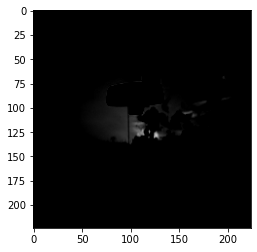

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


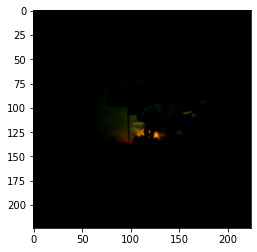

In [46]:
plt.imshow(imgs_for_input[234])
plt.show()
plt.imshow(imgs_for_output[234])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


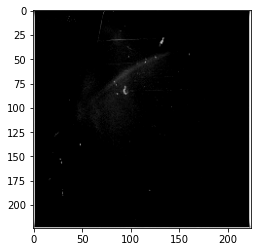

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


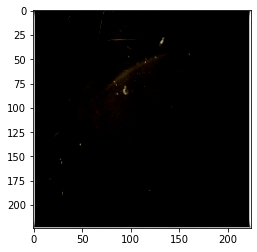

In [47]:
plt.imshow(imgs_for_input[235])
plt.show()
plt.imshow(imgs_for_output[235])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


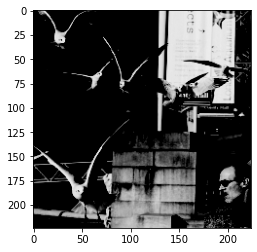

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


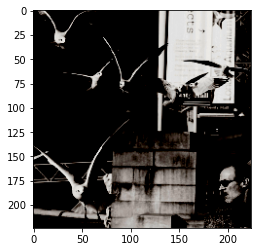

In [48]:
plt.imshow(imgs_for_input[236])
plt.show()
plt.imshow(imgs_for_output[236])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


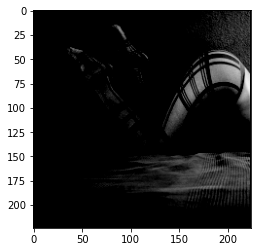

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


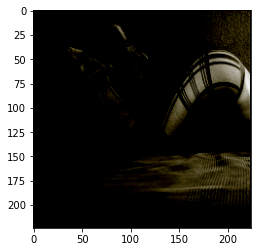

In [49]:
plt.imshow(imgs_for_input[237])
plt.show()
plt.imshow(imgs_for_output[237])

In [40]:
import math

def psnr(original, predicted):
    mse = np.mean((original - predicted) ** 2)
    if mse == 0:
        return 100
    else:
        max_pixel = 255.0
        psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
        return psnr


In [41]:
predicted_images = model.predict(test_input)
for i in range(test_input.shape[0]):
    psnr_val = psnr(test_output[i], predicted_images[i])
    print(f"PSNR for image {i}: {psnr_val}")


4/4 [==============================] - 3s 686ms/step
PSNR for image 0: 51.905911012360306
PSNR for image 1: 52.755424649213396
PSNR for image 2: 57.771558649303465
PSNR for image 3: 55.63213907124249
PSNR for image 4: 50.24515222936782
PSNR for image 5: 54.681125335785225
PSNR for image 6: 50.42583458559689
PSNR for image 7: 54.423797399858564
PSNR for image 8: 51.416615223332556
PSNR for image 9: 49.64237107420744
PSNR for image 10: 57.615723510128866
PSNR for image 11: 51.66533770405182
PSNR for image 12: 51.402723774003505
PSNR for image 13: 60.0872262254721
PSNR for image 14: 53.65358887696809
PSNR for image 15: 55.43133685108988
PSNR for image 16: 51.46139608542211
PSNR for image 17: 51.3421350399702
PSNR for image 18: 50.300019278194014
PSNR for image 19: 54.449348669638326
PSNR for image 20: 59.647879795857726
PSNR for image 21: 51.46515449133612
PSNR for image 22: 49.43988197321728
PSNR for image 23: 59.09883293591295
PSNR for image 24: 57.028541320649936
PSNR for image 25: 53.

In [42]:
import math
import numpy as np

psnr_values = []
for i in range(len(predicted_images)):
    mse = np.mean((test_output[i] - predicted_images[i]) ** 2)
    psnr = 20 * math.log10(255.0 / math.sqrt(mse))
    psnr_values.append(psnr)

# Calculate the average PSNR for all the test images
average_psnr = np.mean(psnr_values)
print(average_psnr)

53.53471594935478
